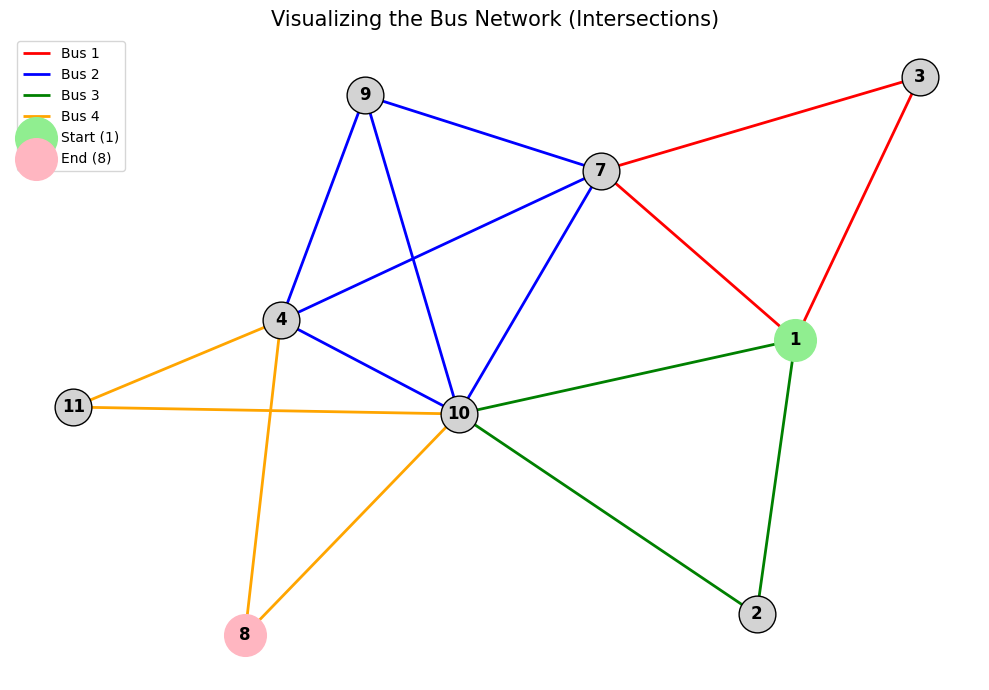

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graph
G = nx.Graph()

# Define the bus routes from the user's image
# Bus 1: 1 -> 3 -> 7 (repeats) -> effectively a triangle
bus_1_edges = [(1, 3), (3, 7), (7, 1)]
# Bus 2: 4 -> 7 -> 9 -> 10 (repeats) -> effectively a square
bus_2_edges = [(4, 7), (7, 9), (9, 10), (10, 4), (4,9), (7,10)] # Fully connected ideally, but let's show cycle for clarity
# Bus 3: 2 -> 1 -> 10 (repeats)
bus_3_edges = [(2, 1), (1, 10), (10, 2)]
# Bus 4: 8 -> 4 -> 11 -> 10 (repeats)
bus_4_edges = [(8, 4), (4, 11), (11, 10), (10, 8)]

# Add nodes and edges
all_edges = bus_1_edges + bus_2_edges + bus_3_edges + bus_4_edges
G.add_edges_from(all_edges)

# Position nodes (spring layout usually works well for connectivity)
pos = nx.spring_layout(G, seed=42, k=0.5)

# Draw the graph
plt.figure(figsize=(10, 7))

# Draw specific bus routes with different colors and styles
nx.draw_networkx_edges(G, pos, edgelist=bus_1_edges, edge_color='red', width=2, label='Bus 1')
nx.draw_networkx_edges(G, pos, edgelist=bus_2_edges, edge_color='blue', width=2, label='Bus 2')
nx.draw_networkx_edges(G, pos, edgelist=bus_3_edges, edge_color='green', width=2, label='Bus 3')
nx.draw_networkx_edges(G, pos, edgelist=bus_4_edges, edge_color='orange', width=2, label='Bus 4')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightgrey', edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_weight='bold')

# Highlight Start and End
nx.draw_networkx_nodes(G, pos, nodelist=[1], node_color='#90EE90', node_size=900, label="Start (1)") # Green
nx.draw_networkx_nodes(G, pos, nodelist=[8], node_color='#FFB6C1', node_size=900, label="End (8)")   # Red

plt.title("Visualizing the Bus Network (Intersections)", fontsize=15)
plt.legend(loc='upper left')
plt.axis('off')

# Save and display
plt.tight_layout()
plt.savefig('bus_graph.png')